# Решающие деревья и решающие леса.

# 1. Решающие деревья

Рассмотрим модельную задачу регрессии. Объектами будут являться точки на плоскости (т.е. каждый объект описывается 2 признаками), целевая переменная — расстояние от объекта до точки (0, 0).

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации

In [2]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

Сгенерируем выборку

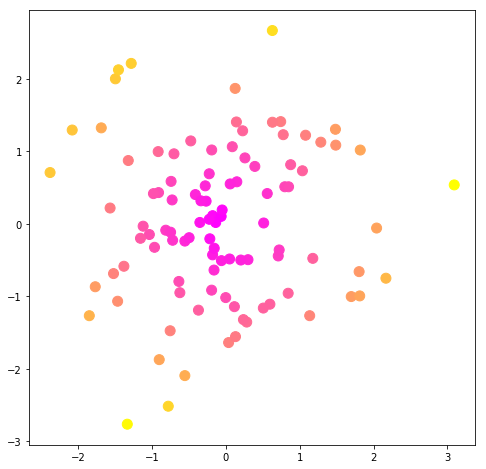

In [3]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [4]:
from sklearn.tree import DecisionTreeRegressor

Обучим дерево на сгенерированных данных и предскажем ответы для каждой точки решетки

[[-3.37806275 -3.76258799]
 [-3.36806275 -3.76258799]
 [-3.35806275 -3.76258799]
 ...
 [ 4.06193725  3.65741201]
 [ 4.07193725  3.65741201]
 [ 4.08193725  3.65741201]]


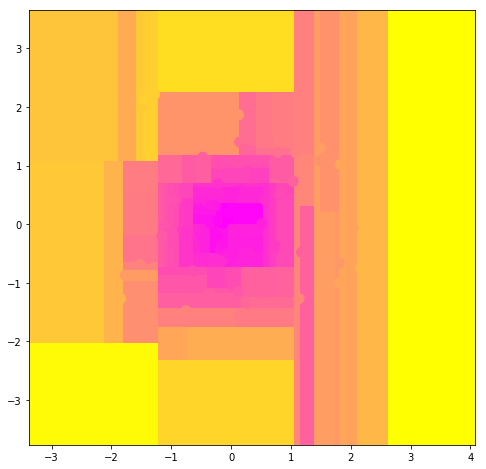

In [5]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)
print(np.c_[xx.ravel(), yy.ravel()])

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

# Задание

Сейчас мы сгенерировали 100 точек из нормального распределения и обучили решающее дерево на них. Сгенерируйте 300 точек из нормального распределения, обучите на них дерево и выведите на экран результат (как на картинке выше).

Сгенерированные точки и расстояние до точек сохраните в массивы data_x300, data_y300, для обучения и предсказания используйте эти массивы.

Улучшилось ли предсказание алгоритма на решётке? (т.е. стала ли раскраска всей плоскости более правильной?)

In [ ]:
#your code here

Вернёмся к исходным данным (100 точек).

Посмотрим как будут выглядеть разделяющая поверхность в зависимости от 
- минимального количества объектов в листе
- максимальной глубины дерева

In [ ]:
plt.figure(figsize=(18, 18))
for i, max_depth in enumerate([1, 2, 4, 6]):
    for j, min_samples_leaf in enumerate([1, 5, 10, 15]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((4, 4), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

- Как влияет увеличение максимальной глубины и/или уменьшение минимального количества объектов выборки в листе на качество на обучающей выборке? на переобучение?

## Неустойчивость решающих деревьев

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться.
Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.


In [ ]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indices = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indices], data_y[indices])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter')

## Подбор параметров

Посмотрим на качество дерева в зависимости от параметров на одном из стандартных наборов данных - Бостонском датасете.

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()
print(data.DESCR)

In [ ]:
X_full = data.data
y_full = data.target

print(X_full[:3])

In [ ]:
X_full.shape

In [ ]:
y_full[:10]

- разобъём все данные на train и test
- будем оценивать качество алгоритма по кросс-валидации

In [ ]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size=100, 
                                        random_state=241)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(X.shape[0], shuffle=True, random_state=241)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print(-cross_val_score(regr, X, y, cv=cv, 
                       scoring='neg_mean_squared_error').mean())

In [ ]:
regr.fit(X, y)

# Задание

Метрика MSЕ имеет не ограничена сверху. Поэтому для оценки качества алгоритма можно также пользоваться метрикой R2 (коэффициент детерминации), так как он не превышает 1 (и чем ближе к 1, тем лучше).

Выведите на экран значение R2 алгоритма ('r2').

In [ ]:
#your code here

Для сравнения качества модели при различных наборах параметров или для сравнения моделей на одном датасете можно использовать, как и раньше, MSE.

Будем подбирать параметры решающего дерева по сетке с целью увеличить качество алгоритма. Будем подбирать значения max_features и max_depth.

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]},
                  cv=cv,
                  scoring='neg_mean_squared_error')
gs.fit(X, y)

In [ ]:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

# Задание

Теперь попробуем одновременно подбирать значения max_features, max_depth и min_samples_leaf. Ищите min_samples_leaf в диапазоне range(1,20).

In [ ]:
#your code here

In [ ]:
gs.best_score_

Как в данной задаче зависит качество алгоритма от количества параметров, которые мы оптимизируем?

# Решающие деревья для классификации

Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

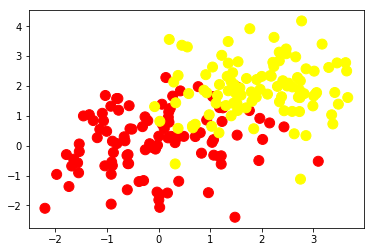

In [6]:
n = 100
a = np.random.normal(loc=0, size=(n, 2))
b = np.random.normal(loc=2, size=(n, 2))

data_x = np.vstack([a, b])
data_y = np.hstack([np.zeros(n), np.ones(n)])

scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='autumn')

Попробуем разделить эти два класса, обучив решающее дерево. Визуализируем полученную границу разделения класссов.

(-3.204395904455571, 4.655604095544261)

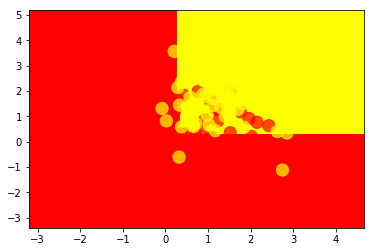

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=7)
clf.fit(data_x, data_y)
xx, yy = get_grid(data_x)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
pcolormesh(xx, yy, predicted, cmap='autumn')
scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=150, cmap='autumn', alpha=0.7)
ylim([yy.min(),yy.max()])
xlim([xx.min(),xx.max()])

# Задание
По аналогии с GridSearchCV для DecisionTreeRegressor используйте GridSearchCV для DecisionTreeClassifier, чтобы посмотреть, как различные параметры влияют на качество классификации.

возьмите cv=5 (число фолдов), параметры 'min_samples_leaf': [1, 3, 7, 20], 'max_depth': [2, 3, 5, 10]

In [ ]:
#Your code here

In [ ]:
print(gs.best_params_)

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)
clf.fit(data_x, data_y)
xx, yy = get_grid(data_x)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
pcolormesh(xx, yy, predicted, cmap='autumn')
scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=150, cmap='autumn', alpha=0.7)
ylim([yy.min(),yy.max()])
xlim([xx.min(),xx.max()])

## 2. Решающий лес

Посмотрим, какое качество можно получить при использовании решающего леса. Будем делать предсказания на Boston dataset.

In [11]:
from sklearn.model_selection import KFold, cross_val_score

In [12]:
regr = DecisionTreeRegressor()
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

NameError: name 'X' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=100)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=300, n_jobs=-1)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

In [ ]:
regr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

# Задание
Постройте график качества классификации на кросс-валидации в зависимости от числа деревьев.

На каждой итерации цикла обучайте регрессор командой regr = ... и добавляйте в список Scores число cross_val_score:
Scores.append(cross_val_score(...))

In [ ]:
from tqdm import tqdm

Ntrees = np.arange(5,120,20)
Scores = []

for elem in tqdm(Ntrees):
    #Your code here
    regr = ...
    Scores.append(...)
    
plot(Scores)
xticks(arange(len(Ntrees)), Ntrees)

# Задание
Поработайте с датасетом wine_data (в каждой строке этого датасета содержится информация о бутылках вина одного из трёх видов: в первой колонке - вид вина (1, 2 или 3), в колонках 1-13 - свойства вина). 

1) Посчитайте качество DecisionTreeClassifier и RandomForestClassifier на кросс-валидации.

2*) Попробуйте уменьшить число признаков с помощью какого-либо метода отбора признаков (http://scikit-learn.org/stable/modules/feature_selection.html). Добейтесь увеличения качества RandomForestClassifier на кросс-валидации.

In [ ]:
data = pd.read_csv('wine_data.csv', header=None)
print(data.shape)
data.head()

In [ ]:
y = data[0].as_matrix()
X = data.drop(0, axis=1).as_matrix()
print(X.shape, y.shape)

In [ ]:
#Your code here

# Задание
Примените к BostonDataset линейную регрессию. Сравните ее качество на кросс-валидации с качеством DecisionTreeRegressor и RandomForestRegressor.
Какой алгоритм работает лучше?

In [ ]:
regr = #your algroithm here
cv = KFold(data_x.shape[0], shuffle=True, random_state=241)

print(cross_val_score(regr, data_x, data_y, cv=cv, scoring='neg_mean_squared_error').mean())

#Try other algorithms